# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [4]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
data_path = 'C:/Users/Karina/Downloads/yulu_bike_sharing_dataset.csv'
df = pd.read_csv(data_path)

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [30]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [16]:
df.shape

(10886, 19)

1. Набор містить 10886 рядків та 19 колонок.
2. Дані мають погодинну деталізацію, тобто один рядок містить дані за одну годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


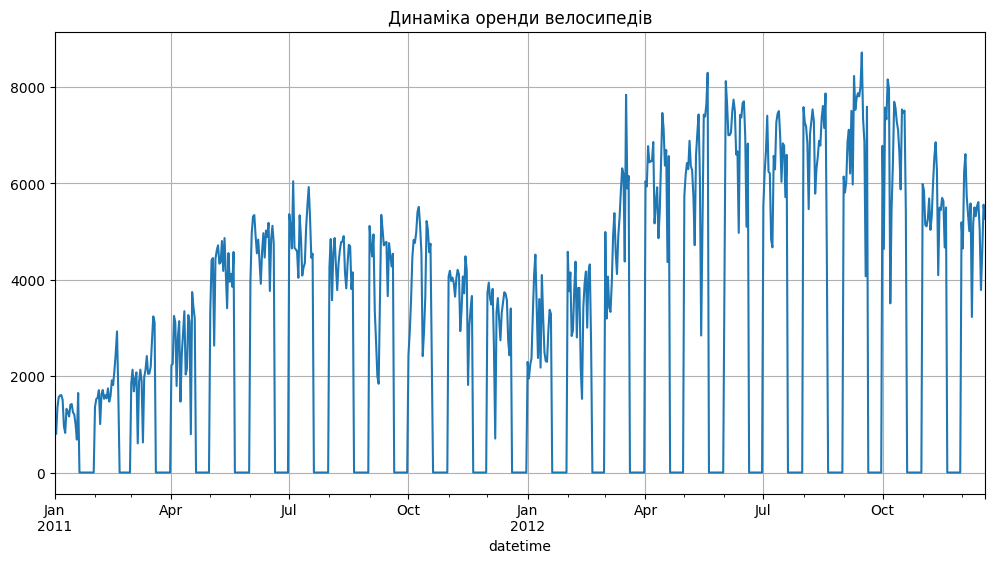

In [24]:
daily_sales = df['count'].resample('D').sum()
daily_sales.plot(
    figsize = (12, 6),
    title = 'Динаміка оренди велосипедів',
    grid = True
)
plt.show()

1. Моя гіпотеза щодо заломів - що ми взяли дані за дні, коли компанія не працювала. І прибрати це можна заресемплівши по бізнес дням.

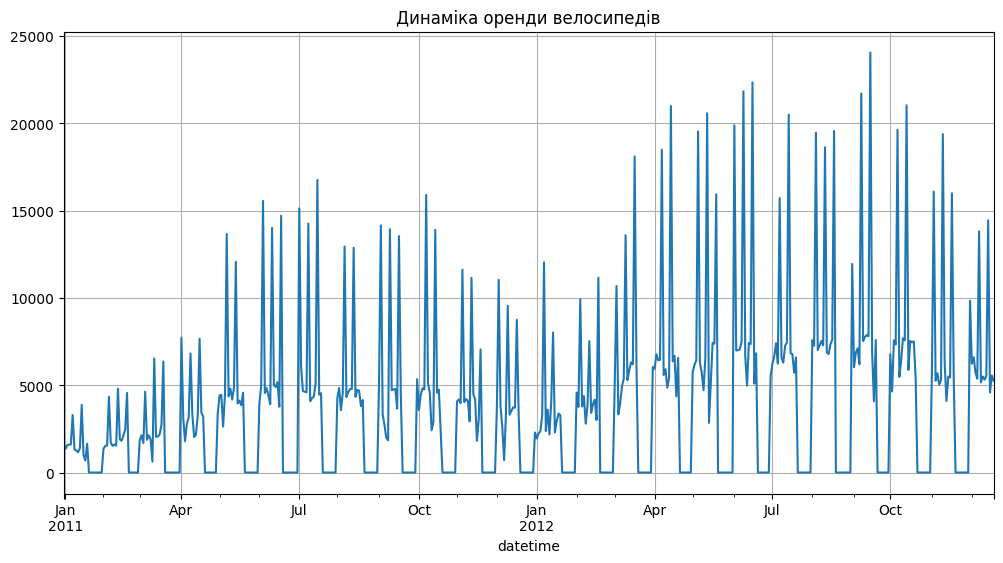

In [25]:
daily_sales = df['count'].resample('B').sum()
daily_sales.plot(
    figsize = (12, 6),
    title = 'Динаміка оренди велосипедів',
    grid = True
)
plt.show()

In [34]:
df[430:441]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-19 23:00:00,1,0,1,1,12.30,13.635,52,31.0009,1,27,28,2011-01-19,19,3,2,Wednesday,2011,1,23
2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8,2011-02-01,1,5,1,Tuesday,2011,2,0
2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3,2011-02-01,1,5,1,Tuesday,2011,2,1
2011-02-01 02:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011-02-01,1,5,1,Tuesday,2011,2,2
2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011-02-01,1,5,1,Tuesday,2011,2,3
2011-02-01 05:00:00,1,0,1,3,5.74,10.605,93,0.0000,0,3,3,2011-02-01,1,5,1,Tuesday,2011,2,5
2011-02-01 06:00:00,1,0,1,3,5.74,10.605,93,0.0000,0,22,22,2011-02-01,1,5,1,Tuesday,2011,2,6
2011-02-01 07:00:00,1,0,1,3,6.56,11.365,93,0.0000,0,52,52,2011-02-01,1,5,1,Tuesday,2011,2,7
2011-02-01 08:00:00,1,0,1,3,6.56,11.365,93,0.0000,3,132,135,2011-02-01,1,5,1,Tuesday,2011,2,8


Моя гіпотеза не підтвердилася) Але чат підказав про відсутність даних, я це перевірила і це дійсно так. Після 19 числа дані відсутні, що спричиняє заломи. Як вихід бачу заресемплити помісячно. Це прибере заломи та графік стане більш приємним.

2. Ми бачимо що за другий рік в нас виросли показники. Також бачимо що в теплі дні оренда зростає.
3. Так, бачимо чіткі сезонні коливання.
4. Аномально низькі показники можуть бути спричинені поганими погодними умовами. Аномально високі можливо спричинені якимись святами або іншими подіями.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

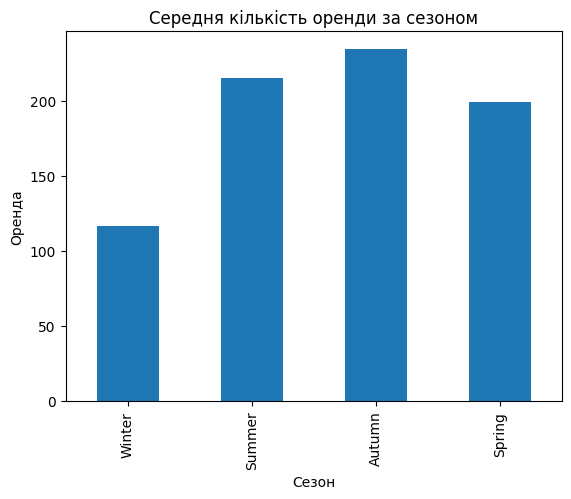

In [39]:
df.groupby('season')['count'].mean().plot.bar(
    title = 'Середня кількість оренди за сезоном',
    xlabel = 'Сезон',
    ylabel = 'Оренда'
)
ax = df.groupby('season')['count'].mean().plot.bar(
    title = 'Середня кількість оренди за сезоном',
    xlabel = 'Сезон',
    ylabel = 'Оренда'
)

ax.set_xticklabels(['Winter', 'Summer', 'Autumn', 'Spring'])
plt.show()

1. Найбільша кількість оренди у 3 квартал(Осінь).
2. Оскільки в Індії інший розподіл сезонів, 'Осінь' припадає саме на літо, що пояснює високі показники.
3. Оренда між найпопулярнішим та найменш популярним кварталами відрізняєть в два рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


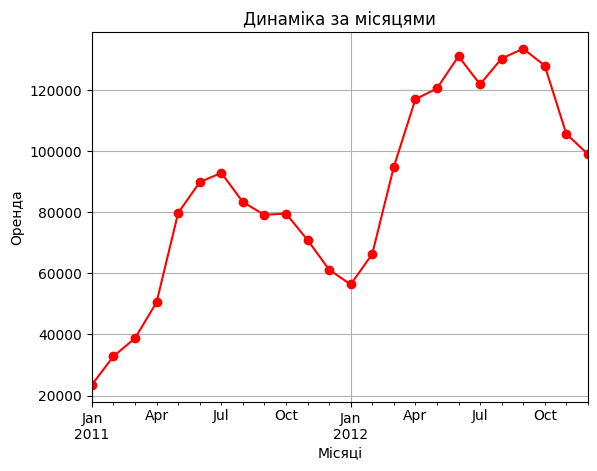

In [57]:
monthly_sales = df['count'].resample('ME').sum()
monthly_sales.plot(
    title = 'Динаміка за місяцями',
    marker = 'o',
    xlabel = 'Місяці',
    ylabel = 'Оренда',
    color = 'red',
    grid = True
)
plt.show()

1. Пік оренди спостерігається у літні місяці, а спад у зимні.
2. Так.
3. Взимку попит на аренду спадає через холод, навесні він підіймається з ростом температури та йде на свій пік улітку. Восени попит спадає з погіршенням погодних умов.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

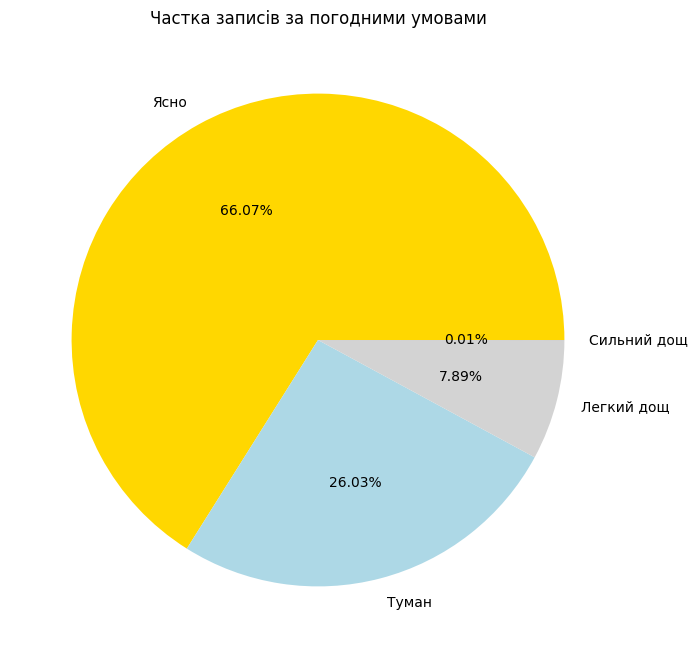

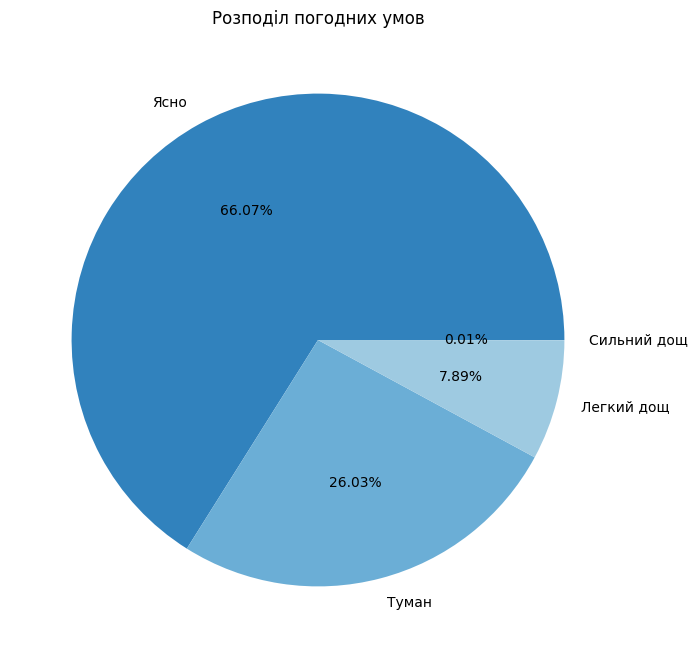

In [55]:
df['weather'].value_counts().plot.pie(
    figsize = (8, 8),
    autopct = '%1.2f%%',
    title = 'Розподіл погодних умов',
    labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    colors = plt.cm.tab20c.colors
)
plt.show()

1. В датасеті переважає ясна погода.
2. Так, є. Його частка 0.01%
3. Погодні умови напряму впливають на оренду велосипедів, адже під дощем не дуже хочеться перебувати на вулиці взагалі, а кататися на велосипеді подавно.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

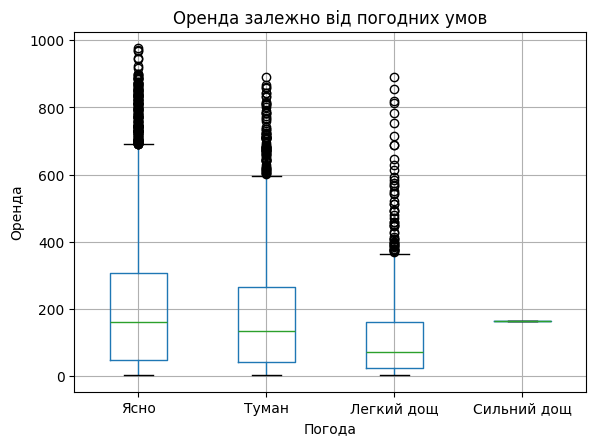

In [6]:
df.boxplot(
    column = 'count',
    by = 'weather'
)
plt.title('Оренда залежно від погодних умов')
plt.xlabel('Погода')
plt.ylabel('Оренда')
plt.suptitle('')
plt.xticks([1, 2, 3, 4], ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
plt.show()

1. При ясній погоді найбільший розкид.
2. Так, викиди присутні на всіх видах погоди, окрім сильного дощу. Найбільше їх при ясній погоді.
3. Найбільша медіана при ясній погоді, може здатися що на сильному дощі, але записи про сильний дощ складають всього 0.01% і буде некорректно відштовхуватися від цих даних.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

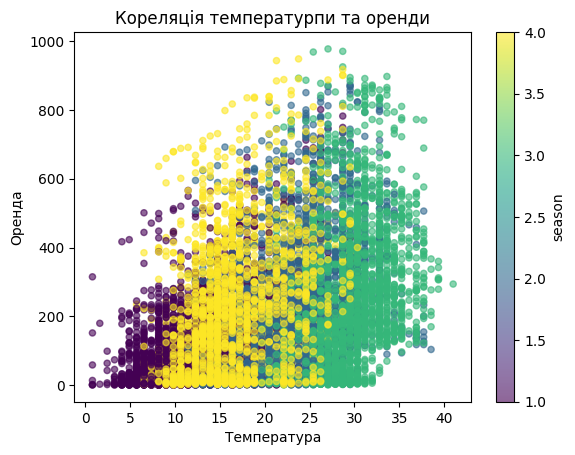

In [13]:
df.plot.scatter(
    x = 'temp',
    y = 'count',
    c = 'season',
    alpha = 0.6,
    title = 'Кореляція температурпи та оренди',
    xlabel = 'Температура',
    ylabel = 'Оренда',
    colormap = 'viridis' 
);

Не впевнена що правильно все вийшло, бо виглядає якось дивно)
1. Так, бачимо позитивну кореляцію між температурою та кількістю оренди.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

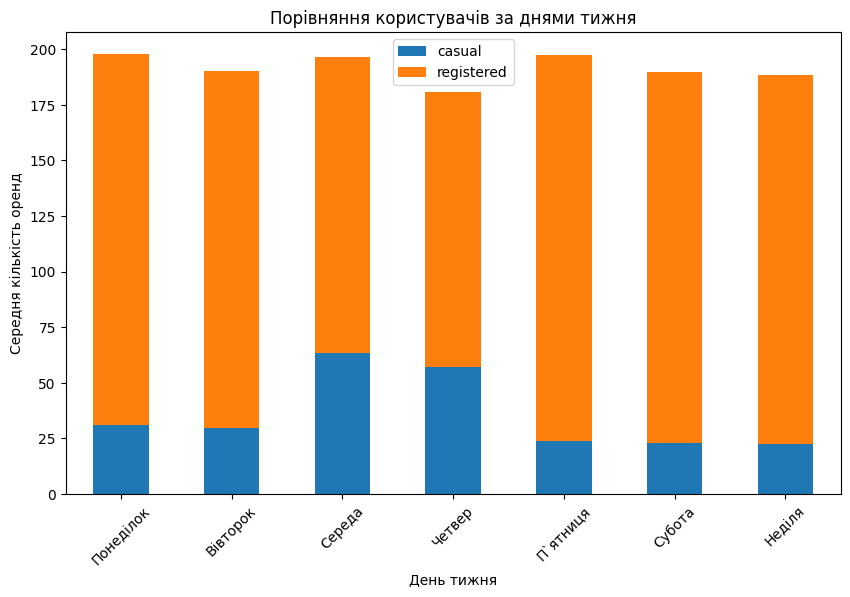

In [21]:
week_avg = df.groupby('weekday')[['casual', 'registered']].mean()
ax = week_avg.plot.bar(
    stacked = True,
    figsize = (10, 6),
    title = 'Порівняння користувачів за днями тижня',
    xlabel = 'День тижня',
    ylabel = 'Середня кількість оренд'
)
ax.set_xticklabels(['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'П`ятниця', 'Субота', 'Неділя'])
plt.xticks(rotation = 45)
plt.show()

1. Найбільше оренди від зареєстрованих користувачів у п'ятницю.
2. У вихідні вже зареєстровані користувачі стабільно мають високі показники, оскільки це люди, які скоріш за все полюбляють у вільний час кататися на велосипеді. А от незареєстровані, мають більші показники у будні дні. Я вважаю що так складається, через те що 'casual' люди орендують велосипед за потреби кудись дістатися, а не просто як досуг. І саме в будні потреба вище.